In [16]:
import numpy as np
import matplotlib.pyplot as plt


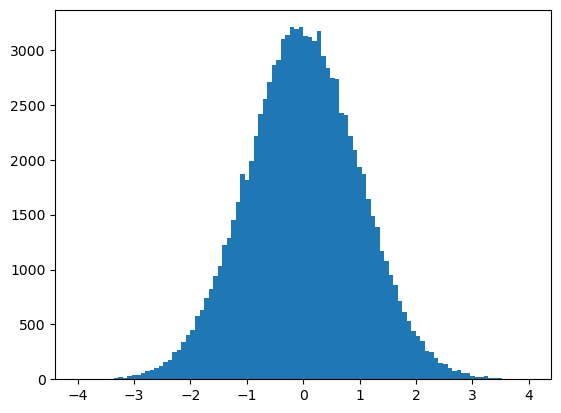

In [17]:
x = np.random.normal(size=100000)
_ = plt.hist(x, range=(-4,4), bins=100)

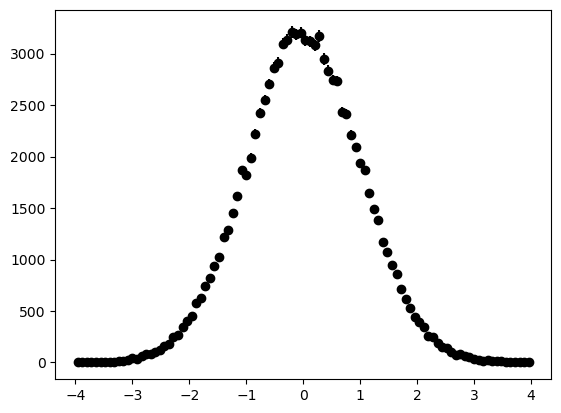

In [18]:
nh, xe = np.histogram(x, range=(-4,4), bins=100)

cx = 0.5*(xe[1:]+xe[:-1])

_ = plt.errorbar(cx, nh, nh**0.5, fmt='ko')

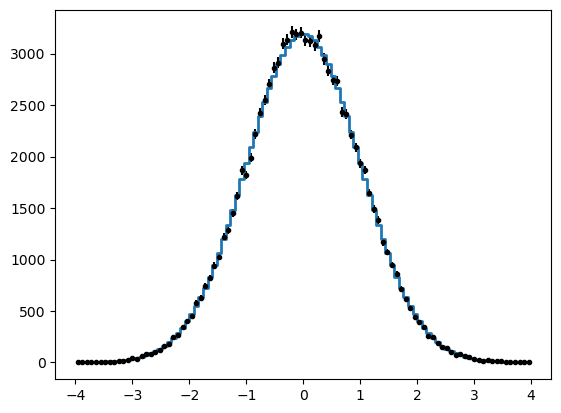

In [19]:
from scipy.stats import norm

plt.errorbar(cx, nh, nh**0.5, fmt='ko', ms=3)

N = len(x)
exp = N * np.diff( norm.cdf(xe) )
plt.step( cx, exp, lw=2, where='mid' )

In [20]:
# Binned ML
from iminuit import Minuit
from iminuit.cost import BinnedNLL

def cdf(x, mu, sg):
    return norm.cdf(x, mu, sg)

nll = BinnedNLL(nh, xe, cdf)

mi = Minuit(nll, mu=0, sg=1)
mi.migrad()
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 119.7 (χ²/ndof = 1.2)      │              Nfcn = 39               │
│ EDM = 3.29e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │  0.0015   │  0.0032   │            │            │         │         │       │
│ 1 │ sg   │  0.9960   │  0.0022   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       mu       sg │
├────┼───────────────────┤
│ mu │ 9.93e-06     0e-6 │
│ sg │     0e-6 4.97e-06 │
└────┴───────────────────┘

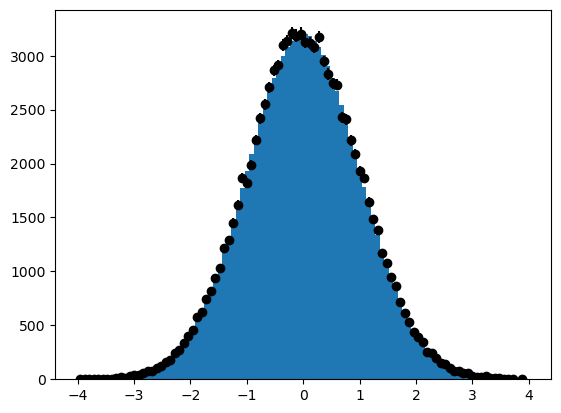

In [21]:
mi.visualize()

In [22]:
from iminuit.cost import UnbinnedNLL

def pdf(x, mu, sg):
    return norm.pdf(x, mu, sg)

nll_binned = BinnedNLL(nh, xe, cdf)
nll_unbinned = UnbinnedNLL(x, pdf)

mi_binned = Minuit(nll_binned, mu=0, sg=1)
mi_unbinned = Minuit(nll_unbinned, mu=0, sg=1 ) 

In [23]:
# Seeing the time it takes for the unbinned and binned fits to process.
from time import process_time

unbinned_start = process_time()
mi_unbinned.migrad()
mi_unbinned.hesse()
unbinned_stop = process_time()


binned_start = process_time()
mi_binned.migrad()
mi_binned.hesse()
binned_stop = process_time()
 
print('Unbinnned took:', unbinned_stop-unbinned_start)
print('Binned took:   ', binned_stop-binned_start)

Unbinnned took: 0.33918499999999696
Binned took:    0.0018500000000010175


In [24]:
# let's define two polynomial like models

# y = mx + c
def p1(x, m, c):
    return m*x + c

# y = mx^2 + c
def p2(x, m, c):
    return m*x**2 + c

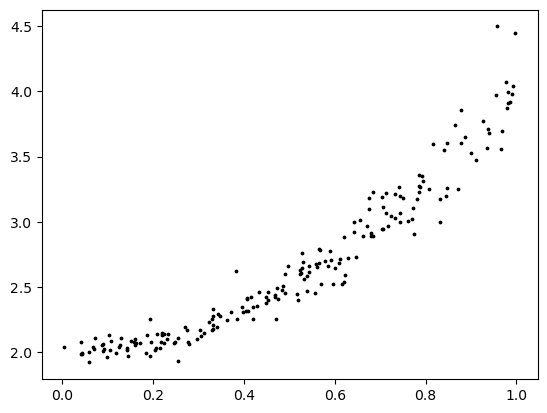

In [25]:
# generate some random x values
x_i = np.random.uniform(0, 1, size=200)

# calculate y values according to model above
y_i = p2(x_i, m=2, c=2)

# and add some noise
y_noise = 0.2*x_i**2 + 0.05 
y_i = np.random.normal(y_i, y_noise )

plt.scatter( x_i, y_i, c='k', s=3)

In [27]:
# iminuit expects errors on points
# for this example we don't have any
# so set them all to 1
y_e = np.ones_like(y_i)

# now do some fits
from iminuit.cost import LeastSquares

chisq = LeastSquares(x_i, y_i, y_e, p2)
mi = Minuit(chisq, m=2, c=2)
mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.088 (χ²/ndof = 0.0)      │              Nfcn = 28               │
│ EDM = 2.5e-22 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   2.02    │   0.25    │            │            │         │         │       │
│ 1 │ c    │   2.00    │   0.11    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────┐
│   │      m      c │
├───┼───────────────┤
│ m │ 0.0612 -0.020 │
│ c │ -0.020 0.0115 │
└───┴───────────────┘

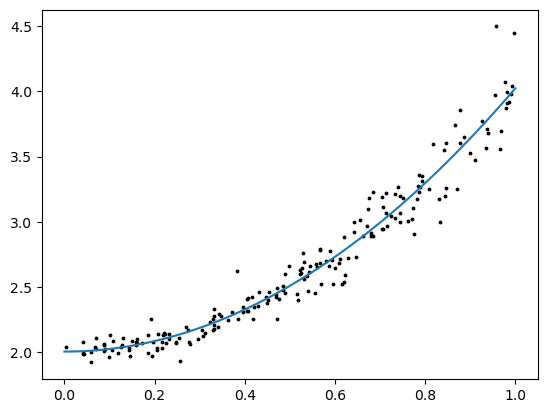

In [28]:
plt.scatter( x_i, y_i, c='k', s=3)
# plot fit result
x = np.linspace(0,1,100)
plt.plot(x, p2(x, *mi.values))

In [29]:
# can try out a straight line fit too
chisq2 = LeastSquares(x_i, y_i, y_e, p1)
mi2 = Minuit(chisq2, m=2, c=1)
mi2.migrad() 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.399 (χ²/ndof = 0.0)      │              Nfcn = 32               │
│ EDM = 4e-24 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   2.04    │   0.26    │            │            │         │         │       │
│ 1 │ c    │   1.64    │   0.15    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────┐
│   │      m      c │
├───┼───────────────┤
│ m │ 0.0669 -0.034 │
│ c │ -0.034 0.0218 │
└───┴───────────────┘

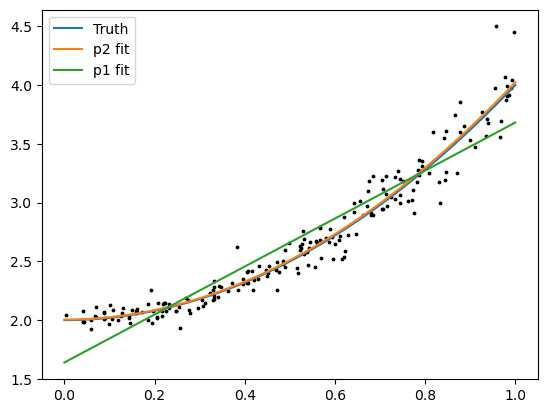

In [30]:
plt.scatter( x_i, y_i, c='k', s=3)
# plot fit result
x = np.linspace(0,1,100)
plt.plot(x, p2(x, 2, 2), label='Truth')
plt.plot(x, p2(x, *mi.values), label='p2 fit')
plt.plot(x, p1(x, *mi2.values), label='p1 fit')

plt.legend()

## Another least-squares example

- this time points with error bars

In [31]:
x_i = np.linspace(0,1,11)
y_i = p2(x_i, m=2, c=2)
y_e = 0.2*x_i**5 + 0.1

y_i = np.random.normal(y_i, y_e)

chisq = LeastSquares(x_i, y_i, y_e, p2)

mi = Minuit(chisq, m=2, c=2)
mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.956 (χ²/ndof = 0.3)      │              Nfcn = 31               │
│ EDM = 7.33e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   2.15    │   0.16    │            │            │         │         │       │
│ 1 │ c    │   1.95    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       m       c │
├───┼─────────────────┤
│ m │  0.0248 -0.0050 │
│ c │ -0.0050 0.00228 │
└───┴─────────────────┘

((array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  array([1.94704593, 1.89623391, 2.09069789, 2.1384054 , 2.28822927,
         2.51459696, 2.81010173, 2.97185017, 3.39449359, 3.45414921,
         4.17170427]),
  array([0.1     , 0.100002, 0.100064, 0.100486, 0.102048, 0.10625 ,
         0.115552, 0.133614, 0.165536, 0.218098, 0.3     ])),
 (array([0.        , 0.02631579, 0.05263158, 0.07894737, 0.10526316,
         0.13157895, 0.15789474, 0.18421053, 0.21052632, 0.23684211,
         0.26315789, 0.28947368, 0.31578947, 0.34210526, 0.36842105,
         0.39473684, 0.42105263, 0.44736842, 0.47368421, 0.5       ,
         0.52631579, 0.55263158, 0.57894737, 0.60526316, 0.63157895,
         0.65789474, 0.68421053, 0.71052632, 0.73684211, 0.76315789,
         0.78947368, 0.81578947, 0.84210526, 0.86842105, 0.89473684,
         0.92105263, 0.94736842, 0.97368421, 1.        ]),
  array([1.95239995, 1.95388925, 1.95835713, 1.96580361, 1.97622868,
         1.98963235, 2.0060146 

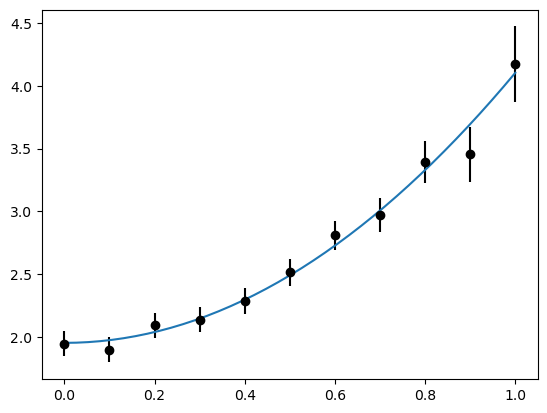

In [32]:
mi.visualize() 

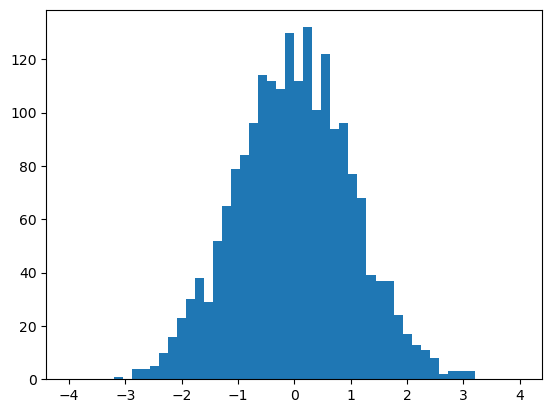

In [33]:
# generate some data
x = np.random.normal(size=2000)

# bin into a histogram
nh, xe = np.histogram( x, bins=50, range=(-4,4) )

_ = plt.hist(x, bins=50, range=(-4,  4))

In [34]:
# compute bin centres
cx = 0.5*(xe[:-1]+xe[1:])

# get model prediction at bin center
def model(x, mu, sg):
    return norm.pdf(x, mu, sg)

# I need the appproriate normalisation nevents * bin_width
bw = ( xe[-1] - xe[0] ) / ( len(xe)-1 )

# and the total number of events
N = len(x)

def pred(x, mu, sg):
    return N * bw * model(x, mu, sg)

# now we have to mask empty bins

cx = cx[ nh!=0 ]
nh = nh[ nh!=0 ]

chisq = LeastSquares( cx, nh, nh**0.5, pred)

mi = Minuit( chisq, mu=0, sg=1 ) 

mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 29.63 (χ²/ndof = 0.8)      │              Nfcn = 29               │
│ EDM = 7.57e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │  -0.009   │   0.023   │            │            │         │         │       │
│ 1 │ sg   │   1.023   │   0.017   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       mu       sg │
├────┼───────────────────┤
│ mu │ 0.000533 -0.02e-3 │
│ sg │ -0.02e-3 0.000295 │
└────┴───────────────────┘

((array([-3.12, -2.8 , -2.64, -2.48, -2.32, -2.16, -2.  , -1.84, -1.68,
         -1.52, -1.36, -1.2 , -1.04, -0.88, -0.72, -0.56, -0.4 , -0.24,
         -0.08,  0.08,  0.24,  0.4 ,  0.56,  0.72,  0.88,  1.04,  1.2 ,
          1.36,  1.52,  1.68,  1.84,  2.  ,  2.16,  2.32,  2.48,  2.64,
          2.8 ,  2.96,  3.12]),
  array([  1.,   4.,   4.,   5.,  10.,  16.,  23.,  30.,  38.,  29.,  52.,
          65.,  79.,  84.,  96., 114., 112., 109., 130., 112., 132., 101.,
         122.,  94.,  96.,  77.,  68.,  39.,  37.,  37.,  24.,  17.,  13.,
          11.,   8.,   2.,   3.,   3.,   3.]),
  array([ 1.        ,  2.        ,  2.        ,  2.23606798,  3.16227766,
          4.        ,  4.79583152,  5.47722558,  6.164414  ,  5.38516481,
          7.21110255,  8.06225775,  8.88819442,  9.16515139,  9.79795897,
         10.67707825, 10.58300524, 10.44030651, 11.40175425, 10.58300524,
         11.48912529, 10.04987562, 11.04536102,  9.69535971,  9.79795897,
          8.77496439,  8.24621125,  6.

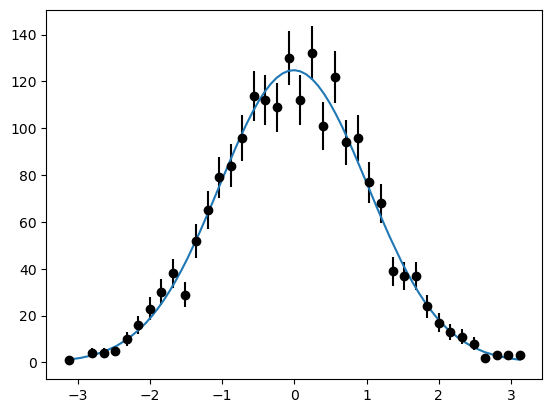

In [35]:
mi.visualize()

In [36]:
# our classic example of fitting for mu and sigma of some normally distributed data

x = np.random.normal(2, 3, size=1000)

def model(x, mu, sg):
    return norm.pdf(x, mu, sg)

n2ll = UnbinnedNLL(x, model)

mi = Minuit( n2ll, mu=2, sg=3 )
mi.migrad() 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5061                       │              Nfcn = 24               │
│ EDM = 5.59e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │   2.11    │   0.10    │            │            │         │         │       │
│ 1 │ sg   │   3.04    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      mu      sg │
├────┼─────────────────┤
│ mu │ 0.00924   0.000 │
│ sg │   0.000 0.00462 │
└────┴─────────────────┘

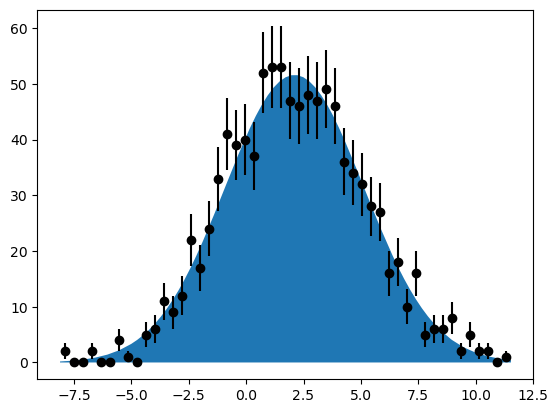

In [37]:
mi.visualize()

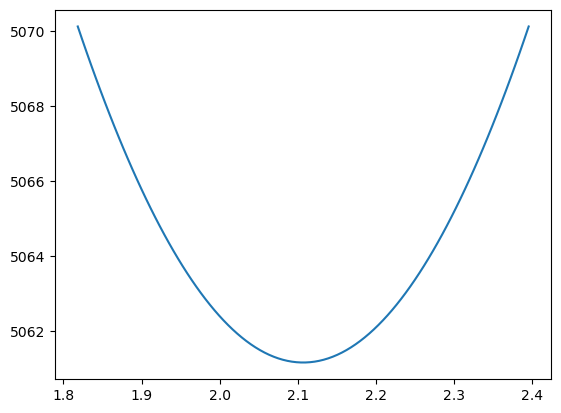

In [38]:
## profile likelihood in 1D (by hand)

mscan = np.linspace( mi.values['mu'] - 3*mi.errors['mu'], mi.values['mu'] + 3*mi.errors['mu'], 100)

n2ll_vals = []
for m in mscan:
    mi.values['mu'] = m
    mi.fixed['mu'] = True
    mi.migrad() 
    n2ll_vals.append( mi.fval )

plt.plot( mscan, n2ll_vals)

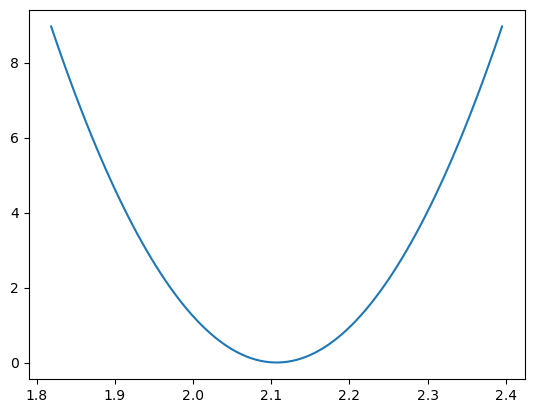

In [39]:
## before we do anything else let's reset the configuration of mi object
mi.fixed['mu'] = False

## and get the global minimum
mi.migrad()

mu_best = mi.values['mu']
sg_best = mi.values['sg']
n2ll_best = mi.fval

dn2ll = np.array(n2ll_vals) - n2ll_best

plt.plot( mscan, dn2ll )

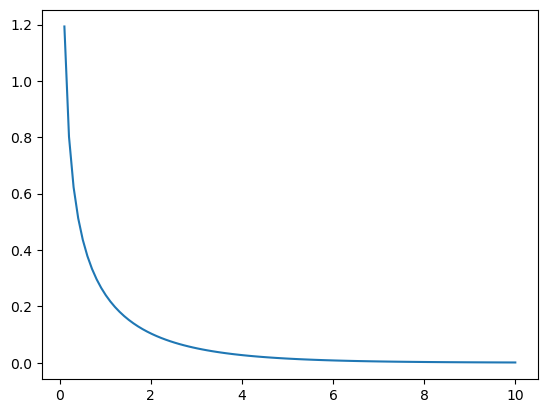

In [40]:
from scipy.stats import chi2
v = np.linspace(0,10,100)
plt.plot(v, chi2.pdf(v,1) )  

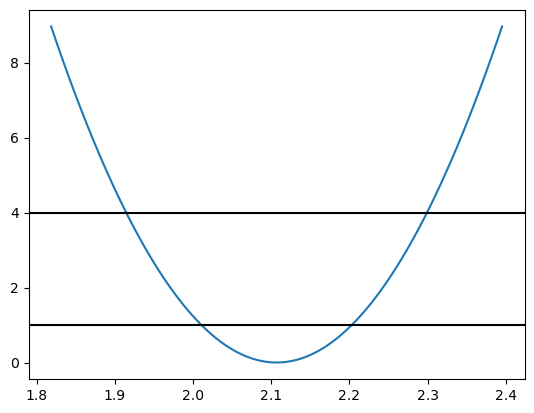

In [42]:
plt.plot( mscan, dn2ll )
plt.axhline( 1, c='k' )
plt.axhline( 4, c='k' )

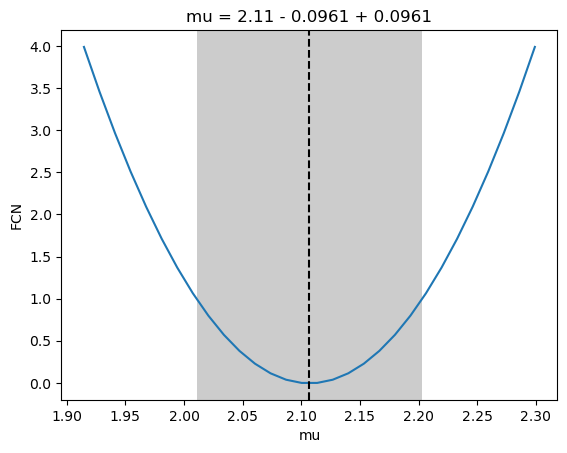

In [43]:
# can just get minuit to do all of this for us
_ = mi.draw_mnprofile('mu') 

In [45]:
# The 2D case

# reset best fit point
mi.fixed['mu'] = False
mi.fixed['sg'] = False
mi.migrad()

mscan = np.linspace( mi.values['mu'] - 4*mi.errors['mu'], mi.values['mu'] + 4*mi.errors['mu'], 100)
sscan = np.linspace( mi.values['sg'] - 4*mi.errors['sg'], mi.values['sg'] + 4*mi.errors['sg'], 100)

mscan, sscan = np.meshgrid( mscan, sscan )

n2ll_vals = []
for mp, sp in zip( mscan.flatten(), sscan.flatten() ):
    mi.values['mu'] = mp
    mi.values['sg'] = sp
    mi.fixed['mu'] = True
    mi.fixed['sg'] = True
    mi.migrad()
    n2ll_vals.append( mi.fval )
    
n2ll_vals = np.array( n2ll_vals ).reshape( mscan.shape )

n2ll_vals = n2ll_vals - n2ll_best  

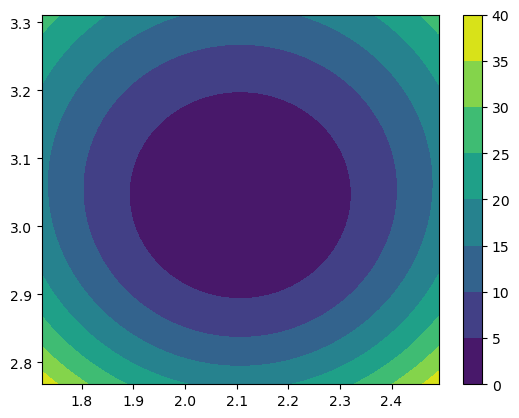

In [46]:
im = plt.contourf( mscan, sscan, n2ll_vals )
plt.colorbar(im)

<a list of 3 text.Text objects>

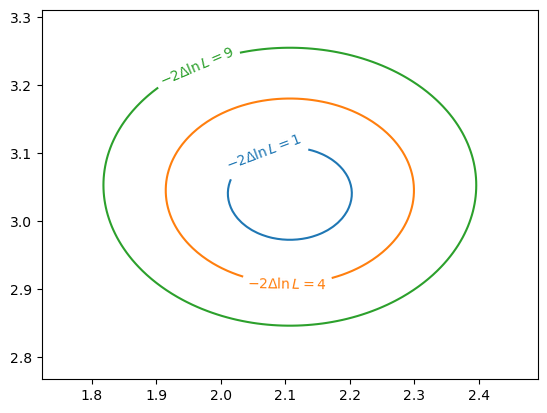

In [47]:
cl = plt.contour( mscan, sscan, n2ll_vals, levels=[1,4,9], colors=['C0','C1','C2'] )
plt.clabel( cl, cl.levels, fmt=lambda x: f'$-2\Delta\ln L={x:.0f}$' )

In [48]:
# The fraction of the distribution each contour contains (it is with 2 degrees of freedom now)
for i in [1,2,3]:
    print( i**2, chi2.cdf(i**2, 1) , chi2.cdf(i**2, 2) )

1 0.6826894921370859 0.3934693402873665
4 0.9544997361036415 0.8646647167633873
9 0.9973002039367398 0.9888910034617577


<a list of 3 text.Text objects>

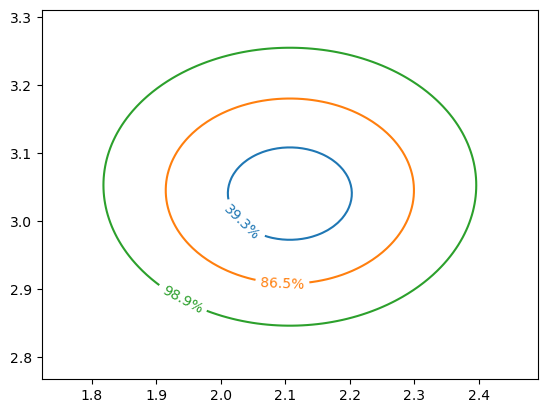

In [49]:
# Put the percentages on the contours instead

cl = plt.contour( mscan, sscan, n2ll_vals, levels=[1,4,9], colors=['C0','C1','C2'] )
def fmt(level):
    cl = chi2.cdf(level, 2)
    return f'{cl:4.1%}'

plt.clabel( cl, cl.levels, fmt=fmt )

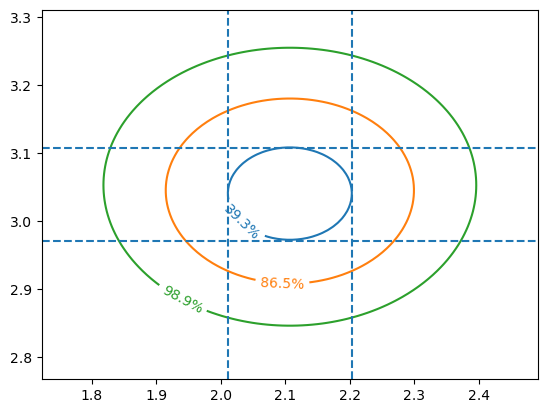

In [50]:
mi.fixed['mu'] = False
mi.fixed['sg'] = False
mi.migrad()

cl = plt.contour( mscan, sscan, n2ll_vals, levels=[1,4,9], colors=['C0','C1','C2'] )
plt.clabel( cl, cl.levels, fmt=fmt )
plt.axvline( mi.values['mu'] - mi.errors['mu'], c='C0', ls='--')
plt.axvline( mi.values['mu'] + mi.errors['mu'], c='C0', ls='--')
plt.axhline( mi.values['sg'] - mi.errors['sg'], c='C0', ls='--')
plt.axhline( mi.values['sg'] + mi.errors['sg'], c='C0', ls='--')

In [51]:
# Comparing 1D to 2D
for sigma in [1,2,3]:
    n2dll_in_1d = sigma**2
    frac_in_1d  = chi2.cdf(sigma**2, 1)
    n2dll_in_2d = chi2.ppf( frac_in_1d, 2 )
    frac_in_2d  = chi2.cdf( n2dll_in_2d, 2 )
    print( sigma, n2dll_in_1d, frac_in_1d, n2dll_in_2d, frac_in_2d)

1 1 0.6826894921370859 2.295748928898636 0.6826894921370859
2 4 0.9544997361036415 6.180074306244168 0.9544997361036415
3 9 0.9973002039367398 11.829158081900795 0.9973002039367398


In [39]:
# slightly fancier way
from tabulate import tabulate
print_rows = [ [ sigma, sigma**2, chi2.cdf(sigma**2,1), 
                 chi2.ppf( chi2.cdf(sigma**2,1),2), chi2.cdf( chi2.ppf( chi2.cdf(sigma**2,1),2),2) ] 
                 for sigma in [1,2,3] ]

print( tabulate(print_rows, headers=['Z-score', '2DLL 1D','Frac 1D', '2DLL 2D', 'Frac 2D'] ) )

  Z-score    2DLL 1D    Frac 1D    2DLL 2D    Frac 2D
---------  ---------  ---------  ---------  ---------
        1          1   0.682689    2.29575   0.682689
        2          4   0.9545      6.18007   0.9545
        3          9   0.9973     11.8292    0.9973


<a list of 3 text.Text objects>

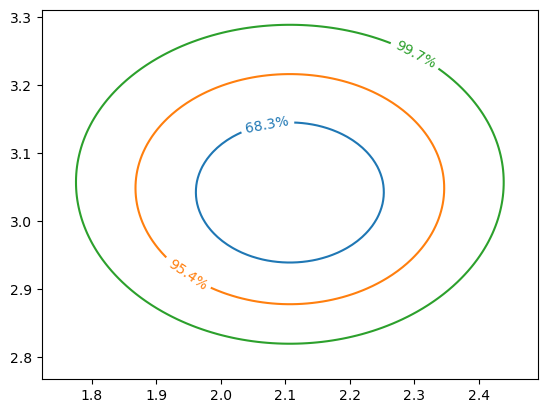

In [52]:
# We can set the contours to represent the same fractions as in the 1D case now 

levels = [ chi2.ppf( chi2.cdf(i**2, 1), 2) for i in [1,2,3] ]
cl = plt.contour( mscan, sscan, n2ll_vals, levels=levels, colors=['C0','C1','C2'] )
plt.clabel( cl, cl.levels, fmt=fmt )

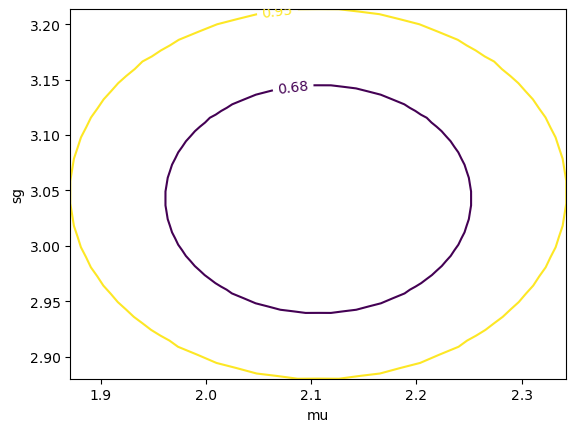

In [53]:
mi.draw_mncontour('mu','sg', cl=[0.68,0.95])

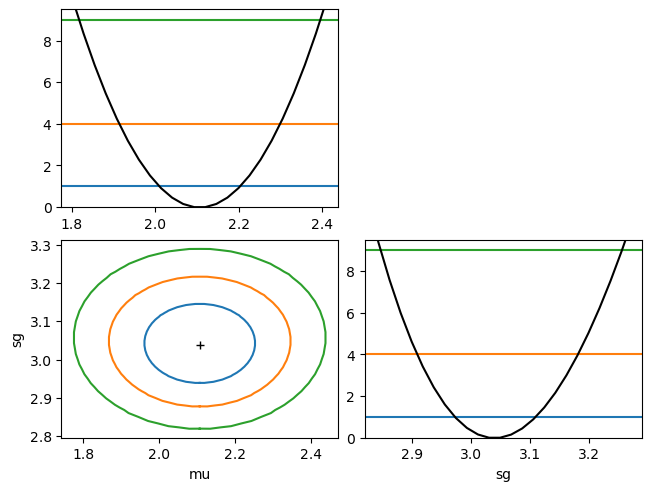

In [54]:
_ = mi.draw_mnmatrix(cl=[1,2,3])